In [1]:
import os
import re

import shutil
import codecs, json 
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import sklearn as sk
import time
from dypac import Dypac
import nilearn
from nilearn import image, plotting, datasets
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
import nilearn.plotting as plotting


In [2]:
import hcp_utils as hcp

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# Extract zip files and delete the original zip files

In [3]:
import os, zipfile

#dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/data_RS_denoised'
dir_name = '/mnt/d/Liz_HCP/data'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [114]:
dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data'

subjects = os.listdir(dir_name)

len(subjects)

9

# Load data & concatenate the 4 sessions

In [17]:
# Define the path to 2D time series
#const_path1 = 'mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/data_RS_denoised' #0
const_path1 = '/mnt/d/Liz_HCP/data' #0
#subjects #1
const_path2 = 'MNINonLinear/Results/rfMRI_REST' #2
sessions = ['1_LR', '1_RL','2_LR','2_RL'] #3
const_path3 = '_Atlas_MSMAll_hp2000_clean.dtseries.nii'#4
data = []

In [18]:
saved_dir_path = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/'


#obj_text = codecs.open(savedFile_path, 'r', encoding='utf-8').read()
#data = json.loads(obj_text)

#for key in data.keys():
 #   data[key] = np.array(data[key])

 
#Loop over each subject and each session per subject
for sub in subjects:
    #if sub in data.keys():
     #   continue
    tmp_dict = {}
    for session in sessions:
        path = '/{0}/{1}/{2}{3}/rfMRI_REST{3}{4}'.format(const_path1, sub, const_path2, session,const_path3)
        #load data per session
        img = nib.load(path)
        X = img.get_fdata()
        #print(stats.describe(X))
        #print(np.mean(X))
        #print(X.shape)
        #print(type(X.shape))
        if X.shape[0] != 1200:
            print("bad subject")
        Xn = hcp.normalize(X) #normalize data per session
        #print(np.mean(Xn))
        #print(stats.describe(Xn))
        tmp_dict[session] = Xn
        #tmp_dict[session] = '/{0}/{1}/{2}{3}/rfMRI_REST{3}{4}'.format(const_path1, sub, const_path2, session,const_path3)
    #Concatenate 4 normalized sessions per subject
    data_sub = np.concatenate((tmp_dict['1_LR'], tmp_dict['1_RL'],tmp_dict['2_LR'], tmp_dict['2_RL']), axis=0)
    print("finished subject {0}".format(sub), flush = True)
    #data_sub
    #save file of subject to the directory
    np.savez_compressed(saved_dir_path + sub, a = data_sub)
    #delete original subject file
    shutil.rmtree(const_path1 + '/' + sub, ignore_errors=False, onerror=None) 
    #break
#data



pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 125525


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 126325


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 127630


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 127933


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 128127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 128632


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 144832


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 146432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


finished subject 147737


In [19]:
#Load data
feat_file = saved_dir_path + '100307.npz'
data_1sub = np.load(feat_file)['a']

In [20]:
data_1sub.shape

(4800, 91282)

# Load the concatenated files

In [115]:
dir_name = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data'

#dir_name = '/mnt/d/Liz_HCP/data_saved'

subjects = os.listdir(dir_name)

len(subjects)

9

In [4]:
subjects_num = []

for i in range(len(subjects)):
    subjects_num.append(subjects[i][:6])

subjects_num  

#Save a list of subject IDs
#with open('subID_47.txt', 'w') as f:
 #   f.write(json.dumps(subjects_num))

['100307',
 '100408',
 '101107',
 '101309',
 '101915',
 '103111',
 '103414',
 '103818',
 '105014',
 '105115',
 '106016',
 '108828',
 '110411',
 '111312',
 '111716',
 '113619',
 '113922',
 '114419',
 '116524',
 '117122',
 '118528',
 '118730',
 '118932',
 '122317',
 '122620',
 '123117',
 '123925',
 '124422',
 '125525',
 '126325',
 '127630',
 '127933',
 '128127',
 '128632',
 '129028',
 '130013',
 '130316',
 '131217',
 '131722',
 '133019',
 '133928',
 '135225',
 '135932',
 '136833',
 '138534',
 '139637',
 '140925']

In [46]:
subjects_num = list(map(int, subjects_num))
print(subjects_num)

[100307, 100408, 101107, 101309, 101915, 103111, 103414, 103818, 105014, 105115, 106016, 108828, 110411, 111312, 111716, 113619, 113922, 114419, 116524, 117122, 118528, 118730, 118932, 122317, 122620, 123117, 123925, 124422, 125525, 126325, 127630, 127933, 128127, 128632, 129028, 130013, 130316, 131217, 131722, 133019, 133928, 135225, 135932, 136833, 138534, 139637, 140925]


In [116]:
paths = []
for sub in subjects:
    paths.append(dir_name + '/{0}'.format(sub))
data = paths
data

['/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/100307.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/111312.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/111716.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/113619.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/113922.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/114419.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/116524.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/122317.npz',
 '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_data/122620.npz']

# Parcellation + correlation matrix

In [6]:
#Create the wanted connectivity matrix
from nilearn import connectome
#kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

ConnectivityMeasure(kind='correlation')

In [7]:
all_features = [] # here is where we will put the data (a container)
#saved_dir_path = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/saved_matrices/'

for i,sub in enumerate(data):
    #load data
    load_data = np.load(data[i])['a']
    # parcell the data according to a specific atlas
    parcellated_data = (hcp.parcellate(load_data, hcp.yeo17))
    # create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([parcellated_data])[0]
    # add to our container
    #np.savez_compressed(saved_dir_path + i, a = correlation_matrix)
    all_features.append(correlation_matrix)
    # keep track of status
    print('finished %s of %s'%(i+1,len(data)))

finished 1 of 47
finished 2 of 47
finished 3 of 47
finished 4 of 47
finished 5 of 47
finished 6 of 47
finished 7 of 47
finished 8 of 47
finished 9 of 47
finished 10 of 47
finished 11 of 47
finished 12 of 47
finished 13 of 47
finished 14 of 47
finished 15 of 47
finished 16 of 47
finished 17 of 47
finished 18 of 47
finished 19 of 47
finished 20 of 47
finished 21 of 47
finished 22 of 47
finished 23 of 47
finished 24 of 47
finished 25 of 47
finished 26 of 47
finished 27 of 47
finished 28 of 47
finished 29 of 47
finished 30 of 47
finished 31 of 47
finished 32 of 47
finished 33 of 47
finished 34 of 47
finished 35 of 47
finished 36 of 47
finished 37 of 47
finished 38 of 47
finished 39 of 47
finished 40 of 47
finished 41 of 47
finished 42 of 47
finished 43 of 47
finished 44 of 47
finished 45 of 47
finished 46 of 47
finished 47 of 47


In [8]:
len(all_features)

47

In [9]:
connectivity_data = np.array(all_features)

In [10]:
connectivity_data.shape

(47, 17, 17)

In [11]:
np.savez_compressed('all_features_47_P17',a = all_features)

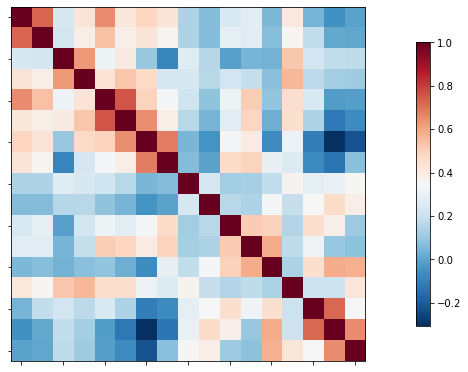

In [12]:
correlation_matrix = connectivity_data[0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

# Load data

In [110]:
#Load connectomes

#feat_file = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/features_11Subs.npz'
feat_file = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/all_features_47.npz'

connectivity_data = np.load(feat_file)['a']

# Extract specific connections

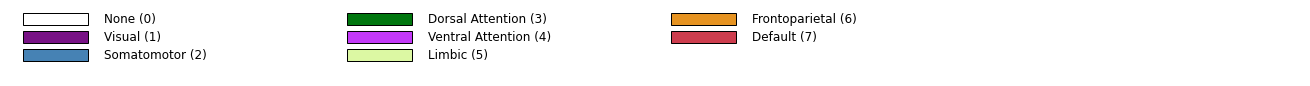

In [15]:
labels = hcp.parcellation_labels(hcp.yeo7)

In [74]:
connectivity_data[0][0,5]

0.2566775699492148

In [101]:
#Indicate only specific correlation (specific parcells) from the matrix- for each subject
specific_parcell_corr = []
#print(data[1])
for i in range(len(connectivity_data)):
    print(i)
    print (connectivity_data[i][0,2])
    specific_parcell_corr.append(connectivity_data[i][0,2])

0
0.5687162466789613
1
0.8174419394660424
2
0.8075978770733018
3
0.6205635123496736
4
0.7385748203915308
5
0.5404636181145442
6
0.550117545307754
7
0.7259634132805319
8
0.5922101705357076
9
0.41407611526953886
10
0.7290126307005097
11
0.784629714581197
12
0.6895487648092223
13
0.6717415371570694
14
0.3535603343932426
15
0.5841498471047878
16
0.6213283925694445
17
0.7949588376951522
18
0.7693104629504718
19
0.7859273103952646
20
0.6082229109702637
21
0.5051710981054822
22
0.5071786983921074
23
0.6683875983800681
24
0.4493924971292726
25
0.46222693780077045
26
0.677691843793427
27
0.5572665815009711
28
0.5725348469112183
29
0.6511808609937856
30
0.6516267337953148
31
0.664763482361413
32
0.591593244582716
33
0.8633163109353045
34
0.6370980374809049
35
0.5237920844877967
36
0.6196864535536932
37
0.5933958843046977
38
0.7250483049354065
39
0.8045686469140966
40
0.750345129373239
41
0.8000930349359797
42
0.741133042942396
43
0.7880681783434383
44
0.7818192383628056
45
0.7948634734589167
46


In [102]:
#convert list to dataframe
specific_parcell_corr  = pd.DataFrame(specific_parcell_corr, index = subjects_num)

In [103]:
specific_parcell_corr

,0
100307,0.568716
100408,0.817442
101107,0.807598
101309,0.620564
101915,0.738575
103111,0.540464
103414,0.550118
103818,0.725963
105014,0.592210
105115,0.414076


In [104]:
specific_parcell_corr[0]

100307    0.568716
100408    0.817442
101107    0.807598
101309    0.620564
101915    0.738575
103111    0.540464
103414    0.550118
103818    0.725963
105014    0.592210
105115    0.414076
106016    0.729013
108828    0.784630
110411    0.689549
111312    0.671742
111716    0.353560
113619    0.584150
113922    0.621328
114419    0.794959
116524    0.769310
117122    0.785927
118528    0.608223
118730    0.505171
118932    0.507179
122317    0.668388
122620    0.449392
123117    0.462227
123925    0.677692
124422    0.557267
125525    0.572535
126325    0.651181
127630    0.651627
127933    0.664763
128127    0.591593
128632    0.863316
129028    0.637098
130013    0.523792
130316    0.619686
131217    0.593396
131722    0.725048
133019    0.804569
133928    0.750345
135225    0.800093
135932    0.741133
136833    0.788068
138534    0.781819
139637    0.794863
140925    0.739808
Name: 0, dtype: float64

# Parcellation - full 

In [ ]:
hcp.mesh.keys()

In [ ]:
plotting.view_surf(hcp.mesh.inflated, hcp.cortex_data(Xn[29]), 
    threshold=1.5, bg_map=hcp.mesh.sulc)

In [ ]:
#parcellation for one subject
Xp = hcp.parcellate(data[0], hcp.yeo7)

In [119]:
load_data = np.load(data[0])['a']
load_data

array([[-0.58150059, -0.07257439,  0.41164436, ..., -0.33437856,
         0.08478886,  0.96278024],
       [ 0.51948119,  0.11188246, -0.51882494, ..., -0.84530077,
        -0.88306422, -0.91523936],
       [-0.38519595, -0.90026091,  0.20469507, ...,  1.11351438,
        -0.02223519,  0.80914969],
       ...,
       [ 1.32761109,  0.0781248 ,  0.24640727, ...,  0.48838678,
         0.49386945,  0.676148  ],
       [-0.3717102 ,  1.78386521,  0.302471  , ..., -0.76850696,
        -1.18447781, -0.37078367],
       [-0.53680091,  0.1731067 ,  1.95317385, ..., -0.75634734,
        -0.58975406, -1.90355982]])

In [120]:
load_data.shape

(4800, 91282)

In [ ]:
from brainspace.datasets import load_group_fc, load_parcellation

labeling = load_parcellation('schaefer', scale=400, join=True)
m = load_group_fc('schaefer', scale=400)
m.shape


In [124]:
schafer_parcel = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)

Downloaded 8482 of 8482 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 259065 of 259065 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


In [127]:
from nilearn.input_data import NiftiLabelsMasker
label_masker = NiftiLabelsMasker(labels_img=schafer_parcel)
label_masker

NiftiLabelsMasker(labels_img={'description': b'Schaefer 2018 Atlas\r\n\r\n\r'
                                             b'\nNotes\r\n-----\r\nThis atla'
                                             b's provides a labeling of cortica'
                                             b'l voxels in the MNI152\r\nspac'
                                             b'e, see Schaefer et al. (2018). E'
                                             b'ach ROI is annotated with a\r'
                                             b'\nnetwork from the Yeo parcel'
                                             b'lation (7- or 17-network solutio'
                                             b'n; see\r\nYeo et al., 2011).\r\n'
                                             b'\r\n\r\nDifferent versions of th'
                                             b'e atlas...
       b'7Networks_RH_Default_PFCdPFCm_4',
       b'7Networks_RH_Default_PFCdPFCm_5',
       b'7Networks_RH_Default_PFCdPFCm_6',
       b'7Network

In [128]:
fmri_matrix = label_masker.fit_transform(load_data)
print(fmri_matrix)

ValueError: File not found: 'maps'

In [129]:
type(schafer_parcel)

sklearn.utils.Bunch

In [ ]:
#parcell each subject according to schafer_2018

In [ ]:
#Parcellate time series for each subject
parcellated_data = []
#print(data[1])
for i in range(len(data)):
    print(i)
    print (data[i])
    parcellated_data.append(hcp.parcellate(data[i], hcp.yeo7))

In [ ]:
len(parcellated_data)

In [ ]:
parcellated_data[0].shape

In [ ]:
df = hcp.ranking(parcellated_data[0][300], hcp.yeo7)
df

In [ ]:
labels = hcp.parcellation_labels(hcp.yeo7)

# Connectivy matrix - full

In [ ]:
#Create the wanted connectivity matrix
from nilearn import connectome
#kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

In [ ]:
#Create connectivity matrix for each subject
connectivity_data = []
#print(data[1])
for i in range(len(parcellated_data)):
    print(i)
    print (data[i])
    connectivity_data.append(correlation_measure.fit_transform([parcellated_data[i]]))

In [ ]:
connectivity_data[1].shape

In [ ]:
correlation_matrix = connectivity_data[1][0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

In [ ]:
connectivity_data[2][0][6,1]

In [ ]:
#Indicate only specific correlation (specific parcells) from the matrix- for each subject
specific_parcell_corr = []
#print(data[1])
for i in range(len(connectivity_data)):
    print(i)
    print (connectivity_data[i][0][6,1])
    specific_parcell_corr.append(connectivity_data[i][0][6,1])

In [ ]:
specific_parcell_corr

In [ ]:
#Reduce to half of the matrix and discrad diagonal
vectorized_correlation = connectome.ConnectivityMeasure(kind='correlation',
                                                        vectorize=True, discard_diagonal=True)
clean_vectorized_correlation = vectorized_correlation.fit_transform([correlation_matrix])[0]
clean_vectorized_correlation.shape  # num_nodes*(num_nodes-1)/2

In [ ]:
len(connectivity_data)

In [ ]:
#Reduce to half of the matrix and discrad diagonal - for each subject
clean_connectivity_data = []
#print(data[1])
for i in range(len(connectivity_data)):
    print(i)
    print (connectivity_data[i])
    clean_connectivity_data.append(vectorized_correlation.fit_transform([connectivity_data[i][0]])[0])

In [ ]:
len(clean_connectivity_data)

In [ ]:
clean_connectivity_data[1].shape

# Save and load data

In [ ]:
#Save the data to disk
np.savez_compressed('features_11Subs',a = clean_connectivity_data)

In [ ]:
#Load data
feat_file = 'features_11Subs.npz'
X_features = np.load(feat_file)['a']

In [ ]:
X_features.shape

In [ ]:
view = plotting.view_connectome(correlation_matrix, node_coords = coords_forPlot)
view

# Load behavioral data

In [57]:
behavior = pd.read_csv("/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/HCP_behavior_includeZscores.csv")

In [58]:
#Take only the connectome subjects from the behavior data
behavior_clean = behavior.loc[behavior['Subject'].isin(subjects_num)]
behavior_clean.shape

(42, 573)

In [59]:
behavior_clean.head()

,Unnamed: 0,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,...,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,GroupType_f,z_score_compare_f
1,2,100307,Q1,Q01,F,26-30,True,1,1,4,...,71.69,71.76,1.76,0.0,1.76,-0.120580,-0.720448,-0.031687,0,0.688761
2,3,100408,Q3,Q03,M,31-35,True,1,1,4,...,114.01,113.59,1.76,2.0,1.68,-0.295012,-0.329899,1.130657,3,1.460556
3,8,101309,S500,Q06,M,26-30,True,1,1,4,...,106.39,104.39,1.80,0.0,1.80,-0.033364,1.547886,0.115483,2,1.432402
5,11,101915,Q3,Q04,F,31-35,True,2,2,4,...,112.11,111.70,1.84,1.0,1.80,-0.033364,1.454413,-1.313170,1,2.767582
11,20,103111,S500,Q06,M,26-30,True,1,1,4,...,109.15,107.30,1.80,0.0,1.80,-0.033364,0.434079,-0.738505,1,1.172584


In [61]:
behavior_clean = behavior_clean.set_index('Subject')
behavior_clean

,Unnamed: 0,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,GroupType_f,z_score_compare_f
Subject,,,,,,,,,,,,,,,,,,,,,
100307,2,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.69,71.76,1.76,0.0,1.76,-0.120580,-0.720448,-0.031687,0,0.688761
100408,3,Q3,Q03,M,31-35,True,1,1,4,100.0,...,114.01,113.59,1.76,2.0,1.68,-0.295012,-0.329899,1.130657,3,1.460556
101309,8,S500,Q06,M,26-30,True,1,1,4,100.0,...,106.39,104.39,1.80,0.0,1.80,-0.033364,1.547886,0.115483,2,1.432402
101915,11,Q3,Q04,F,31-35,True,2,2,4,100.0,...,112.11,111.70,1.84,1.0,1.80,-0.033364,1.454413,-1.313170,1,2.767582
103111,20,S500,Q06,M,26-30,True,1,1,4,100.0,...,109.15,107.30,1.80,0.0,1.80,-0.033364,0.434079,-0.738505,1,1.172584
103414,22,Q2,Q02,F,22-25,True,1,1,4,100.0,...,91.50,89.45,1.76,0.0,1.76,-0.120580,1.250346,-1.100924,1,2.351270
103818,24,Q1,Q01,F,31-35,True,2,2,4,100.0,...,90.63,87.88,1.88,1.0,1.84,0.053852,-0.056421,-0.996804,0,0.940382
105014,29,S500,Q05,F,26-30,True,2,2,4,100.0,...,73.86,72.70,1.80,0.0,1.80,-0.033364,-0.007371,-1.617522,0,1.610150
105115,30,Q2,Q02,M,31-35,True,2,2,4,100.0,...,93.82,91.19,1.76,0.0,1.76,-0.120580,0.271659,-0.446167,1,0.717825


In [62]:
behavior_clean.index

Int64Index([100307, 100408, 101309, 101915, 103111, 103414, 103818, 105014,
            105115, 106016, 108828, 110411, 111312, 111716, 113619, 113922,
            114419, 117122, 118932, 122317, 122620, 123117, 123925, 124422,
            125525, 126325, 127630, 128127, 128632, 129028, 130013, 130316,
            131217, 131722, 133019, 133928, 135225, 135932, 136833, 138534,
            139637, 140925],
           dtype='int64', name='Subject')

In [63]:
specific_parcell_corr.index

Int64Index([100307, 100408, 101107, 101309, 101915, 103111, 103414, 103818,
            105014, 105115, 106016, 108828, 110411, 111312, 111716, 113619,
            113922, 114419, 116524, 117122, 118528, 118730, 118932, 122317,
            122620, 123117, 123925, 124422, 125525, 126325, 127630, 127933,
            128127, 128632, 129028, 130013, 130316, 131217, 131722, 133019,
            133928, 135225, 135932, 136833, 138534, 139637, 140925],
           dtype='int64')

In [79]:
Flank_score = behavior_clean['Flanker_AgeAdj']

In [66]:
z_score_compare_f = behavior_clean['z_score_compare_f']

# Filter connectivity data acoording to behavioral data

In [105]:
specific_parcell_corr = specific_parcell_corr[specific_parcell_corr.index.isin(behavior_clean.index)]
specific_parcell_corr.shape

(42, 1)

# Examine link between specific cortical connection and behavior

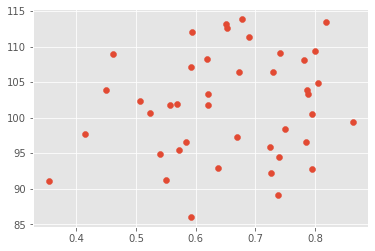

<AxesSubplot:xlabel='0', ylabel='Flanker_AgeAdj'>

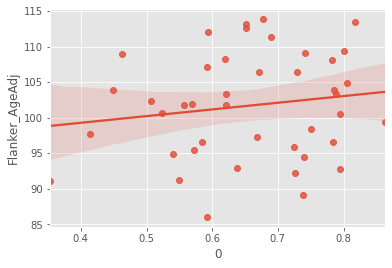

In [108]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = specific_parcell_corr[0]
y = Flank_score

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)


In [109]:
import scipy as sc
from scipy import stats

sc.stats.pearsonr(x, y)

(0.15455130570814324, 0.328436422517055)